In [91]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import json
import pandas as pd
import seaborn as sns

## Data Exploration

#### Understanding the Structure of the Dataset 

In [92]:
# reading the data

file = open("./dataset/glassdoor_reviews.json", 'r', encoding='utf8')
dataset_dict = json.load(file)

In [93]:
print("Dataset Size: %d" % (len(dataset_dict)))
print(f"Sample Item: {dataset_dict[0]}")

Dataset Size: 838566
Sample Item: {'firm': 'AFH-Wealth-Management', 'date_review': '2015-04-05', 'job_title': ' ', 'current': 'Current Employee', 'location': '', 'overall_rating': 2, 'work_life_balance': 4.0, 'culture_values': 3.0, 'diversity_inclusion': '', 'career_opp': 2.0, 'comp_benefits': 3.0, 'senior_mgmt': 3.0, 'recommend': 'x', 'ceo_approv': 'o', 'outlook': 'r', 'headline': 'Young colleagues, poor micro management', 'pros': 'Very friendly and welcoming to new staff. Easy going ethic.', 'cons': 'Poor salaries, poor training and communication.'}


In [94]:
# convert dict to pandas dataframe 
dataset = pd.DataFrame.from_dict(dataset_dict, orient='columns')

In [95]:
# (rows, cols) of the dataset
dataset.shape

(838566, 18)

In [96]:
# fields in our dataset
dataset.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

In [97]:
# first 5 observations
dataset.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,,2,4.0,3.0,,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,,5,2.0,3.0,,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [98]:
# last 5 observations
dataset.tail()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
838561,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,v,v,v,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations
838562,the-LEGO-Group,2021-06-03,Sales Associate,"Current Employee, less than 1 year","London, England, England",3,,,,,,,o,o,o,working at lego,staff discount is really nice,micro managing is a hassle can become mentally...
838563,the-LEGO-Group,2021-06-03,Strategist,Current Employee,,4,5.0,5.0,5.0,3.0,5.0,3.0,v,o,o,not interested in growing their people,loved brand for a lot of people,you can spend 6-10 years without any promotion...
838564,the-LEGO-Group,2021-06-04,Customer Service Representative,"Current Employee, less than 1 year",,5,,,,,,,o,o,o,Great Place to Work,"Good wages, good hours, lots of resources","Working every other weekend, busy seasons can ..."
838565,the-LEGO-Group,2021-06-04,Human Resources Specialist,"Current Employee, more than 3 years","Kladno, Central Bohemian, Central Bohemian",5,4.0,5.0,4.0,4.0,5.0,5.0,v,v,o,I strongly recommend the LEGO Group as employer,The LEGO Group is company with many opportunit...,Many things are centralized in Denmark and rel...


#### Exploring metadata fields (firm, date reviewed, job title, etc.)

In [99]:
# list of reviewed companies
dataset['firm'].unique()

array(['AFH-Wealth-Management', 'AJ-Bell', 'ALDI', 'AQA', 'ASDA', 'ASOS',
       'AXA-UK', 'Abcam',
       'Abertawe-Bro-Morgannwg-University-Health-Board', 'Accenture',
       'Accor', 'Achieving-for-Children', 'ActionCOACH',
       'Active-Care-Group', 'Adecco', 'Age-UK-The-National-Charity',
       'AlixPartners', 'American-Express', 'Amey', 'Angard-Staffing',
       'Anglian-Water', 'Anglo-American',
       'Animal-and-Plant-Health-Agency', 'Aon', 'Apple', 'Arcadia',
       'Arnold-Clark', 'AstraZeneca', 'Aviva', 'B-and-M-Retail',
       'B-and-Q', 'BAT', 'BBC', 'BDO', 'BHS', 'BIS', 'BNP-Paribas',
       'BNY-Mellon', 'BP', 'BPP-Holdings', 'BT',
       'Babcock-International-Group', 'Babylon-Health',
       'Bain-and-Company', 'Balfour-Beatty', 'Bannatyne-Group',
       'Barchester-Healthcare', 'Barclays', 'Barnardo-s',
       'Barnet-and-Chase-Farm-Hospitals-NHS-Trust', 'Barnett-Waddingham',
       'Barratt-Developments', 'Barts-Health-NHS-Trust',
       'BayWa-r-e-renewable-energ

In [100]:
# max and min firm name length
np_len = np.vectorize(len)
firm_name_len = np_len(dataset['firm'])
max(firm_name_len), min(firm_name_len)

(50, 2)

In [101]:
#printing longest and shortest firm names
dataset['firm'][np.where(firm_name_len == max(firm_name_len))[0][0]], dataset['firm'][np.where(firm_name_len == min(firm_name_len))[0][0]]

('Engineering-and-Physical-Sciences-Research-Council', 'BP')

In [102]:
#number of reviews per firm
dataset['firm'].value_counts()

firm
IBM                         60436
McDonald-s                  49450
Deloitte                    46995
EY                          34050
PwC                         33227
                            ...  
i-Net-Solution                  4
Health-Protection-Agency        4
The-Survey-Association          3
NPSA                            2
UKCIL                           1
Name: count, Length: 428, dtype: int64

In [103]:
# earliest and latest review dates
min(dataset['date_review']), max(dataset['date_review'])

('2008-01-31', '2021-06-08')

In [104]:
# all dates are length 10
(np_len(dataset['date_review']) != 10).sum()

0

In [105]:
# number of reviews per year
review_years = dataset['date_review'].str.slice(0, 4)
review_years.value_counts()

date_review
2021    144578
2020    140310
2019    103288
2017     91333
2018     87954
2016     84427
2015     69241
2014     39505
2013     24696
2012     20587
2011     10886
2010     10110
2009      5958
2008      5693
Name: count, dtype: int64

In [106]:
# unique review locations
dataset['location'].value_counts()

location
                              297338
London, England, England       58665
New York, NY                   31172
Bangalore                      28102
Hyderābād                      11458
                               ...  
Whitwick, England, England         1
Cardiff by the Sea, CA             1
Jasin                              1
Balikpapan                         1
Wijnegem, Antwerp                  1
Name: count, Length: 14488, dtype: int64

In [107]:
#percentage of data without locations
dataset['location'].value_counts().iloc[0]/len(dataset)

0.35457912674732817

In [108]:
#general locations of companies/company offices reviewed by taking the final part of the address i.e. England from "London, England, England" and CA from "Los Angeles, CA"
valid_locations = dataset['location'][dataset['location'] != ""]
valid_locations.str.split(", ").str[-1].value_counts()

location
England       136903
NY             36496
CA             32133
Bangalore      28102
TX             16635
               ...  
Allerød            1
Pornichet          1
Al `Ajūzah         1
Kandi              1
Lainate            1
Name: count, Length: 3464, dtype: int64

In [109]:
#assuming the values with len 2 are states from the US so we can get the number of reviews for US locations
location_suffix_counts = valid_locations.str.split(", ").str[-1].str.len().value_counts()
location_suffix_counts[2]

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq\\backend\\cython\\checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 


212672

#### Exploring numerical rating fields (overall rating, work life balance, culture values, etc.)

In [ ]:
# Descriptive statistics summary for overall_rating
dataset['overall_rating'].describe()

count    838566.000000
mean          3.655956
std           1.174684
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: overall_rating, dtype: float64

In [ ]:
# Average rating per category

categories = ['work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']

for category in categories:
    dataset[category] = pd.to_numeric(dataset[category], errors='coerce')

avg_ratings = dataset[categories].mean()

print(avg_ratings)
print(dataset.dtypes)


work_life_balance    3.375735
culture_values       3.590164
career_opp           3.461825
comp_benefits        3.398109
senior_mgmt          3.176576
dtype: float64
firm                    object
date_review             object
job_title               object
current                 object
location                object
overall_rating           int64
work_life_balance      float64
culture_values         float64
diversity_inclusion     object
career_opp             float64
comp_benefits          float64
senior_mgmt            float64
recommend               object
ceo_approv              object
outlook                 object
headline                object
pros                    object
cons                    object
dtype: object


In [ ]:
# Mean, Median, Mode of Ratings
mean_ratings = dataset[categories].mean()
median_ratings = dataset[categories].median()
mode_ratings = dataset[categories].mode().iloc[0]

print("mean\n", mean_ratings, "\n")
print("median\n",median_ratings,"\n")
print("mode\n", mode_ratings)

mean
 work_life_balance    3.375735
culture_values       3.590164
career_opp           3.461825
comp_benefits        3.398109
senior_mgmt          3.176576
dtype: float64 

median
 work_life_balance    4.0
culture_values       4.0
career_opp           4.0
comp_benefits        3.0
senior_mgmt          3.0
dtype: float64 

mode
 work_life_balance    4.0
culture_values       5.0
career_opp           4.0
comp_benefits        4.0
senior_mgmt          4.0
Name: 0, dtype: float64


In [ ]:
# Standard Deviation of Ratings, range of ratings, and percentiles
std_dev_ratings = dataset[categories].std()
range_ratings = dataset[categories].max() - dataset[categories].min()
percentiles = dataset[categories].quantile([0.25, 0.5, 0.75])

print("std dev\n", std_dev_ratings, "\n")
print("range ratings\n", range_ratings, "\n")
print("percentiles\n", percentiles)

std dev
 work_life_balance    1.305874
culture_values       1.323280
career_opp           1.271295
comp_benefits        1.218738
senior_mgmt          1.330720
dtype: float64 

range ratings
 work_life_balance    4.0
culture_values       4.0
career_opp           4.0
comp_benefits        4.0
senior_mgmt          4.0
dtype: float64 

percentiles
       work_life_balance  culture_values  career_opp  comp_benefits  \
0.25                2.0             3.0         3.0            3.0   
0.50                4.0             4.0         4.0            3.0   
0.75                4.0             5.0         5.0            4.0   

      senior_mgmt  
0.25          2.0  
0.50          3.0  
0.75          4.0  


In [ ]:
# Ratings Comparison Between Current and Former Employees

current_employees_dataset = dataset[dataset['current'].str.contains("Current")]
former_employees_dataset = dataset[dataset['current'].str.contains("Former")]

current_employees_avg_ratings = current_employees_dataset[categories].mean()
former_employees_avg_ratings = former_employees_dataset[categories].mean()

comparison_dataset = pd.DataFrame({'Current Employees': current_employees_avg_ratings, 'Former Employees': former_employees_avg_ratings})
print(comparison_dataset)


                   Current Employees  Former Employees
work_life_balance           3.513872          3.174871
culture_values              3.777628          3.322489
career_opp                  3.617448          3.235914
comp_benefits               3.484857          3.272066
senior_mgmt                 3.347552          2.927575


#### Exploring non numerical review fields (recommend, pros, cons, etc.)
For the below sentiments: v - Positive, r - Mild, x - Negative, o - No opinion

In [ ]:
# counts for fixed non numerical fields
# TODO: preprocess these to integer values

for column in ['recommend',	'ceo_approv', 'outlook']: 
    print(f"{dataset[column].value_counts()}\n")

recommend
v    427865
o    234248
x    176453
Name: count, dtype: int64

ceo_approv
o    311433
v    286695
r    176930
x     63508
Name: count, dtype: int64

outlook
v    301413
o    294548
r    154948
x     87657
Name: count, dtype: int64



In [ ]:
# Average words in pros and cons
avg_pros_words = dataset['pros'].str.split().apply(len).mean()
avg_cons_words = dataset['cons'].str.split().apply(len).mean()

print(avg_pros_words, avg_cons_words)

# Range of words in pros and cons
range_pros_words = dataset['pros'].str.split().apply(len).max() - dataset['pros'].str.split().apply(len).min()
range_cons_words = dataset['cons'].str.split().apply(len).max() - dataset['cons'].str.split().apply(len).min()

print(range_pros_words, range_cons_words)

# Standard deviation of words in pros and cons
std_dev_pros_words = dataset['pros'].str.split().apply(len).std()
std_dev_cons_words = dataset['cons'].str.split().apply(len).std()

print(std_dev_pros_words, std_dev_cons_words)

14.912506588628682 20.9907711497962
3152 1917
19.60214985282088 39.696699795682584


#### Exploring Missing Data

In [ ]:
# dataset is the pd frame
# Missing data

count_missing_diversity = (dataset['diversity_inclusion'] == '').sum()
print(f"Number of empty string values in 'diversity_inclusion': {count_missing_diversity}")

# Proportion of the missing data comparing to the number of total observations
propotion_empty_diversity = count_missing_diversity / len(dataset)
print(f"Proportion of empty string values in 'column_name': {propotion_empty_diversity}")

Number of empty string values in 'diversity_inclusion': 702500
Proportion of empty string values in 'column_name': 0.8377396650949359


In [ ]:
# Proportion of missing data to entire dataset for each field

columns_to_check = ["work_life_balance", "culture_values", "career_opp", "comp_benefits", "senior_mgmt"]

total_observations = len(dataset)
missing_proportions = {}

for column in columns_to_check:
    # Count the number of null/missing values in the column
    missing_count = (dataset[column] == '').sum()
    
    # Calculate the proportion of missing values
    proportion_missing = missing_count / total_observations
    
    # Store the proportion in the dictionary
    missing_proportions[column] = proportion_missing

# Display the proportion of missing values for each column
missing_proportions


{'work_life_balance': 0.0,
 'culture_values': 0.0,
 'career_opp': 0.0,
 'comp_benefits': 0.0,
 'senior_mgmt': 0.0}

In [ ]:
# Comprenhesive count of missing values in the dataset
totals = dataset.isnull().sum().sort_values(ascending=False)
totals[totals != 0]

culture_values       191373
senior_mgmt          155876
comp_benefits        150082
work_life_balance    149894
career_opp           147501
dtype: int64

# Plots

#### Rating Plots

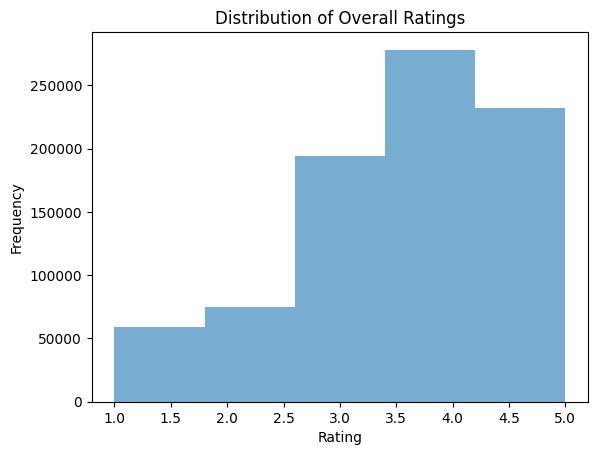

In [ ]:
# Rating Distribution

dataset['overall_rating'].plot.hist(bins=5, alpha=0.6)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


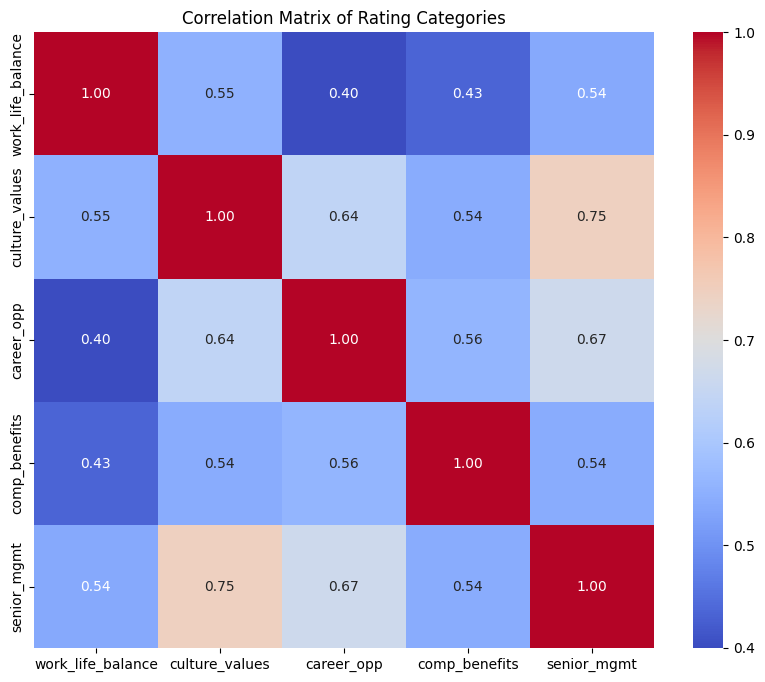

In [ ]:
# Correlation Between Ratings
correlation_matrix = dataset[categories].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Rating Categories')
plt.show()



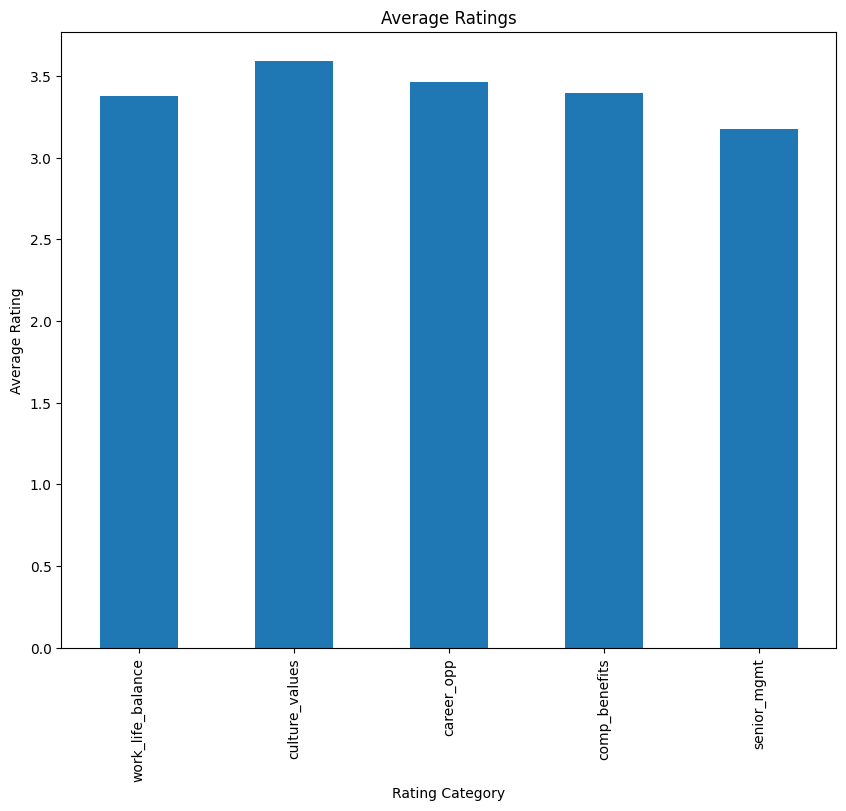

In [ ]:
# Bar chart for other ratings
plt.figure(figsize=(10, 8))
dataset[categories].mean().plot.bar()
plt.title('Average Ratings')
plt.xlabel('Rating Category')
plt.ylabel('Average Rating')
plt.show()


<Figure size 1000x800 with 0 Axes>

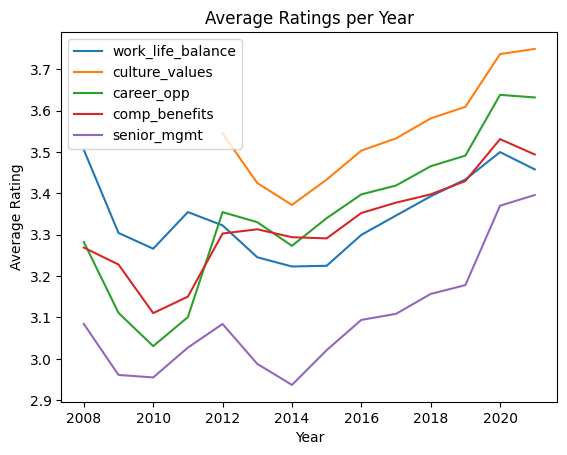

In [ ]:
# Check the average rating per year
dataset['year'] = dataset['date_review'].str.slice(0, 4)
avg_ratings_per_year = dataset.groupby('year')[categories].mean()

plt.figure(figsize=(10, 8))
avg_ratings_per_year.plot()
plt.title('Average Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

C:\Users\merri\AppData\Local\Temp\ipykernel_17364\3566431881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_employees_dataset['year'] = current_employees_dataset['date_review'].str.slice(0, 4).copy()
C:\Users\merri\AppData\Local\Temp\ipykernel_17364\3566431881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  former_employees_dataset['year'] = former_employees_dataset['date_review'].str.slice(0, 4).copy()


<Figure size 1000x800 with 0 Axes>

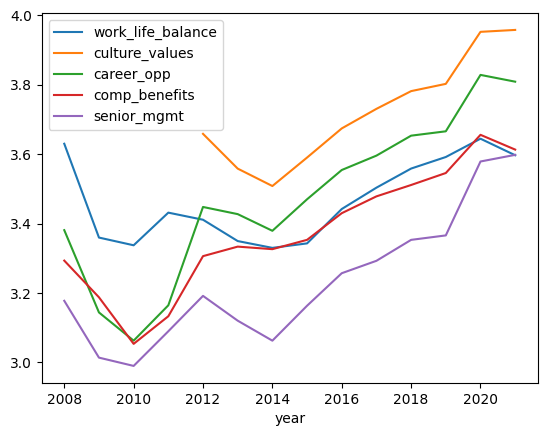

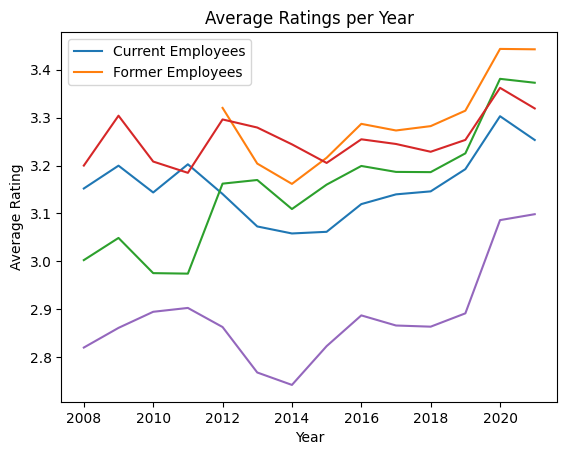

In [ ]:
# Current vs former employees average ratings per year
current_employees_dataset['year'] = current_employees_dataset['date_review'].str.slice(0, 4).copy()
former_employees_dataset['year'] = former_employees_dataset['date_review'].str.slice(0, 4).copy()

current_employees_avg_ratings_per_year = current_employees_dataset.groupby('year')[categories].mean()
former_employees_avg_ratings_per_year = former_employees_dataset.groupby('year')[categories].mean()

plt.figure(figsize=(10, 8))
current_employees_avg_ratings_per_year.plot()
former_employees_avg_ratings_per_year.plot()
plt.title('Average Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(['Current Employees', 'Former Employees'])
plt.show()

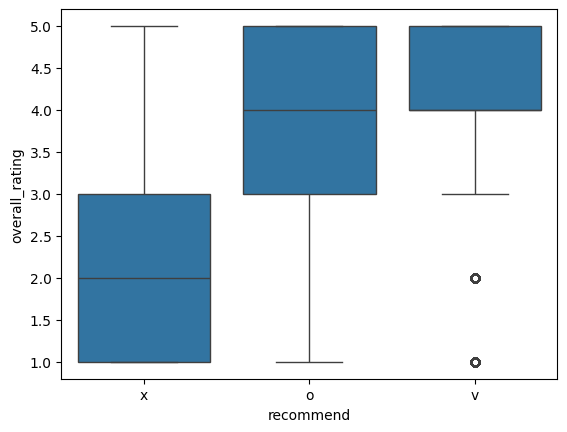

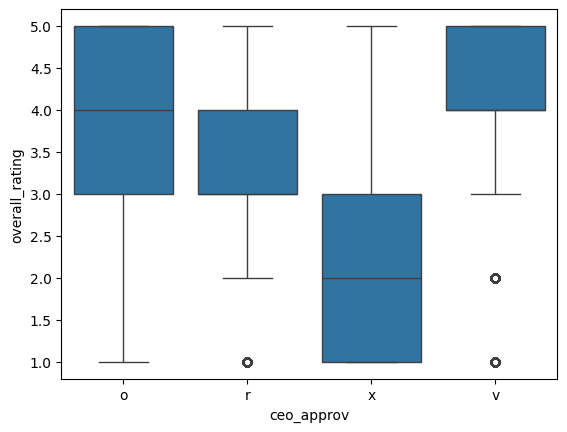

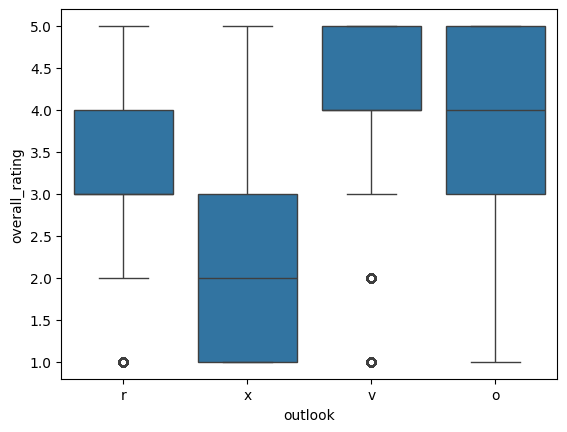

In [ ]:
# How rating relates to recommendation
sns.boxplot(x='recommend', y='overall_rating', data=dataset)
plt.show()

# How rating relates to ceo approval 
sns.boxplot(x='ceo_approv', y='overall_rating', data=dataset)
plt.show()

# How rating relates to outlook
sns.boxplot(x='outlook', y='overall_rating', data=dataset)
plt.show()


#### Ranking Plots

C:\Users\merri\AppData\Local\Temp\ipykernel_17364\2582772798.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  firm_recommendations.apply(pd.value_counts).plot(kind='bar', subplots=True, title="Distribution of firm recommendations", ylabel="Frequency", xlabel="Recommendation")
C:\Users\merri\AppData\Local\Temp\ipykernel_17364\2582772798.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ceo_approval.apply(pd.value_counts).plot(kind='bar', subplots=True, title="Distribution of ceo approval", ylabel="Frequency", xlabel="Recommendation")
C:\Users\merri\AppData\Local\Temp\ipykernel_17364\2582772798.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  outlook.apply(pd.value_counts).plot(kind='bar', subplots=True, title="Distr

array([<Axes: title={'center': 'outlook'}, xlabel='Recommendation', ylabel='Frequency'>],
      dtype=object)

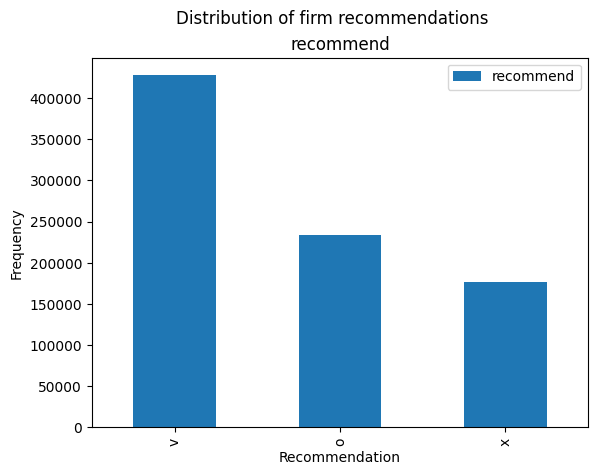

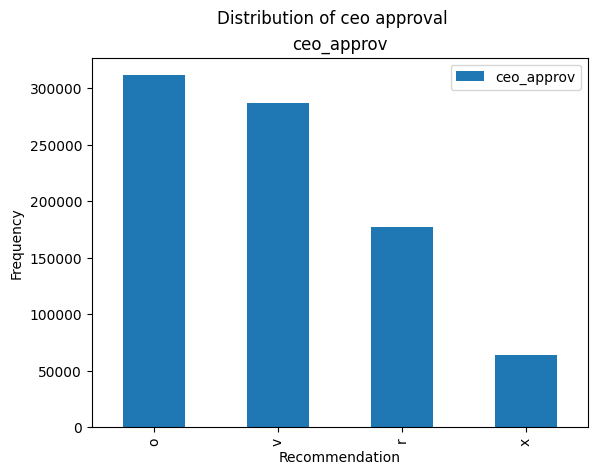

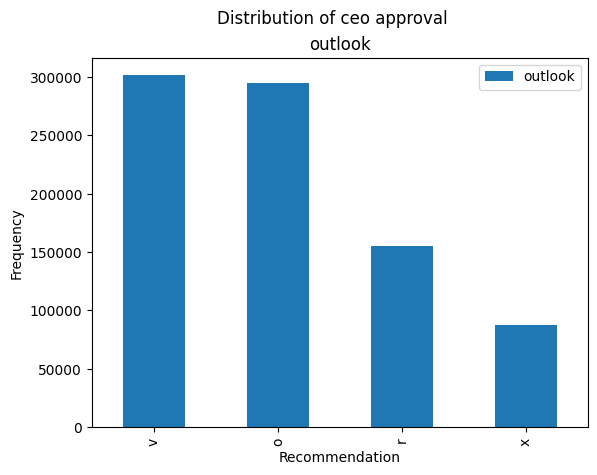

In [ ]:
# Histogram of recommendation of the firm
firm_recommendations = pd.DataFrame(dataset['recommend'])
firm_recommendations.apply(pd.value_counts).plot(kind='bar', subplots=True, title="Distribution of firm recommendations", ylabel="Frequency", xlabel="Recommendation")

# Histogram of CEO approval
ceo_approval = pd.DataFrame(dataset['ceo_approv'])
ceo_approval.apply(pd.value_counts).plot(kind='bar', subplots=True, title="Distribution of ceo approval", ylabel="Frequency", xlabel="Recommendation")

# Histogram of outlook
outlook = pd.DataFrame(dataset['outlook'])
outlook.apply(pd.value_counts).plot(kind='bar', subplots=True, title="Distribution of ceo approval", ylabel="Frequency", xlabel="Recommendation")

#### Word Clouds

In [89]:
pip install WordCloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.4 kB 657.6 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.7 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\wordcloud_cli.exe' -> 'c:\\Python312\\Scripts\\wordcloud_cli.exe.deleteme'



In [110]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

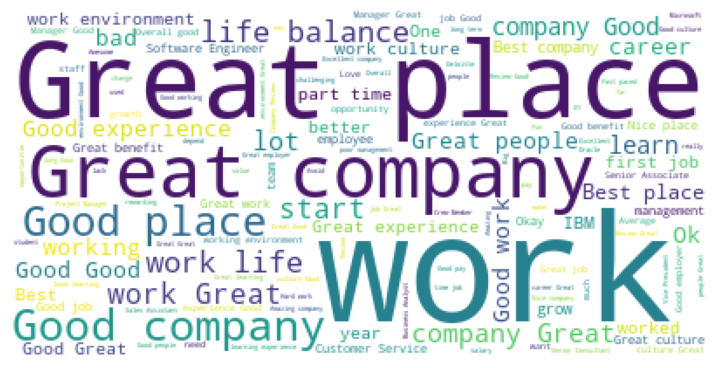

In [119]:
# Wordcloud for words in headline
headline_words = " ".join(str(word) for word in dataset.headline)
headline_wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(headline_words)
plt.figure( figsize=(9,6))
plt.imshow(headline_wordcloud)
plt.axis("off")
plt.show()

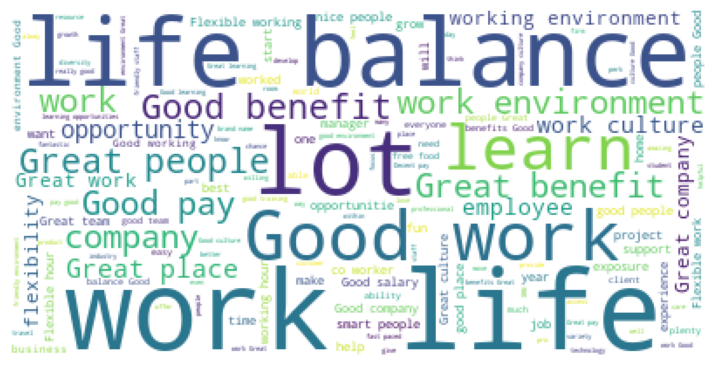

In [120]:
# Wordcloud for words in pros
pros_words = " ".join(str(word) for word in dataset.pros)
pros_wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(pros_words)
plt.figure( figsize=(9,6))
plt.imshow(pros_wordcloud)
plt.axis("off")
plt.show()

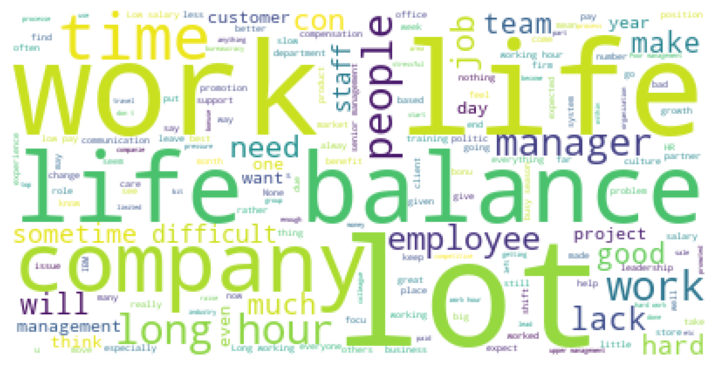

In [121]:
# Wordcloud for words in cons
cons_words = " ".join(str(word) for word in dataset.cons)
cons_wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(cons_words)
plt.figure( figsize=(9,6))
plt.imshow(cons_wordcloud)
plt.axis("off")
plt.show()

# Data Preprocessing